In [ ]:
import warnings #Unterdrückung von Warnungen
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium import Choropleth
from folium.plugins import HeatMap
import datetime
from scipy.stats import norm,skew
from scipy import stats
from sklearn.preprocessing import StandardScaler

**burada path değiştirilmeli kişiye göre**

In [ ]:
data2=pd.read_csv("/content/drive/MyDrive/data/bodrum100.csv")
#data2=pd.read_csv("/content/drive/MyDrive/data/bodrum100.csv")

In [ ]:
data2 = data2.drop(['Region', 'Unnamed: 0'], axis=1)

In [ ]:
data2 = data2.rename(columns={'new2': 'FloatedData'})

In [ ]:
data2 = data2.drop(data2[data2['Depth(km)'] == 0.0].index)

In [ ]:
data2['Date2']= pd.to_datetime(data2["Date"])

**burada path değiştirilmeli kişiye göre**

In [ ]:
data = data2
#data = pd.read_csv("/content/drive/MyDrive/data/bodrum100.csv")
data.head()

,Date,Time,Latitude,Longitude,Depth(km),Magnitude,Distance(km),FloatedData,Date2
0,7/20/2017,03:28:22.81,37.5327,27.4825,5.4,1.8,63.98,2017.547945,2017-07-20
6,7/20/2017,22:10:00.82,36.9637,27.4223,5.4,2.6,2.03,2017.547945,2017-07-20
7,7/20/2017,22:31:09.66,36.9693,27.4057,7.1,6.6,1.15,2017.547945,2017-07-20
8,7/20/2017,22:34:15.33,36.9298,27.6018,5.5,3.7,18.29,2017.547945,2017-07-20
9,7/20/2017,22:34:40.17,36.9663,27.4163,5.4,3.7,1.61,2017.547945,2017-07-20


In [ ]:
data.isnull().any()

Date            False
Time            False
Latitude        False
Longitude       False
Depth(km)       False
Magnitude       False
Distance(km)    False
FloatedData     False
Date2           False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21410 entries, 0 to 24779
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          21410 non-null  object        
 1   Time          21410 non-null  object        
 2   Latitude      21410 non-null  float64       
 3   Longitude     21410 non-null  float64       
 4   Depth(km)     21410 non-null  float64       
 5   Magnitude     21410 non-null  float64       
 6   Distance(km)  21410 non-null  float64       
 7   FloatedData   21410 non-null  float64       
 8   Date2         21410 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.6+ MB


**Data Analizi**

Text(0.5, 0, 'Date')

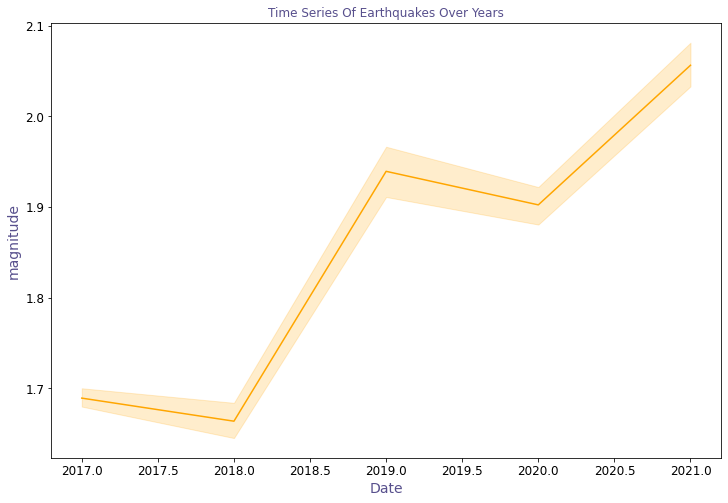

In [ ]:
#plotting a lineplot with magnitudes with respectto dates
plt.figure(figsize=(12,8))
Time_series=sns.lineplot(x=data2['Date2'].dt.year,y="Magnitude",data=data2, color="#ffa600")
Time_series.set_title("Time Series Of Earthquakes Over Years", color="#58508d")
Time_series.set_ylabel("magnitude", color="#58508d")
Time_series.set_xlabel("Date", color="#58508d")

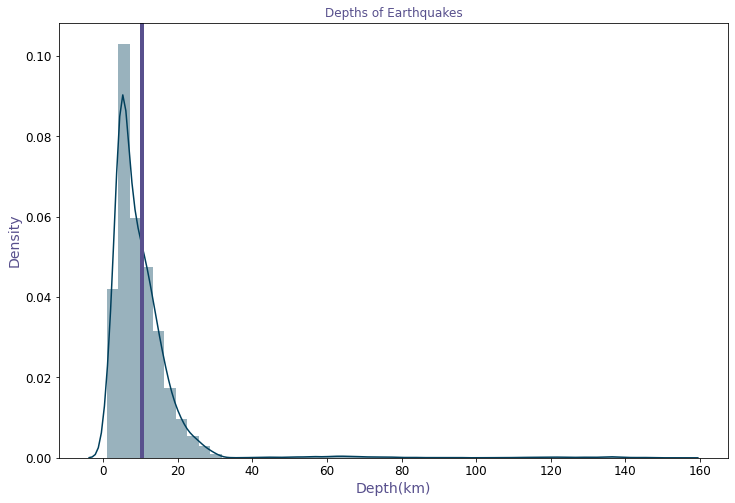

In [ ]:
#Plotting the depth of earthquake and mean depth

plt.figure(figsize=(12,8))
depth = data2["Depth(km)"].values
mean_D= data2["Depth(km)"].mean()
Depth_plot = sns.distplot(depth, color ="#003f5c")
Depth_plot.set_title("Depths of Earthquakes", color="#58508d")
Depth_plot.set_ylabel("Density", color="#58508d")
Depth_plot.set_xlabel("Depth(km)", color="#58508d")

plt.axvline(mean_D,0,1, color="#58508d",linewidth=4,label="Mean")

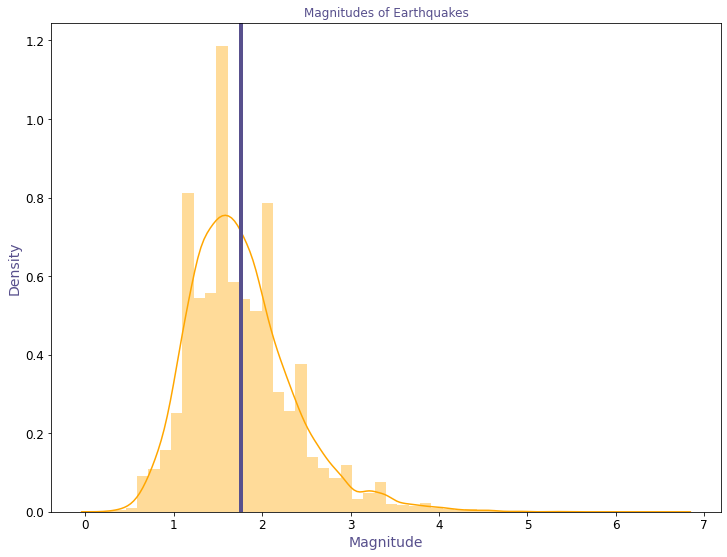

In [ ]:
plt.figure(figsize=(12,9))
strength = data2["Magnitude"].values
mean_M= data2["Magnitude"].mean()
Magnitude_plot = sns.distplot(strength, color ="#ffa600")
Magnitude_plot.set_title("Magnitudes of Earthquakes", color="#58508d")
Magnitude_plot.set_ylabel("Density", color="#58508d")
Magnitude_plot.set_xlabel("Magnitude", color="#58508d")

plt.axvline(mean_M,0,1, color="#58508d",linewidth=4,label="Mean")

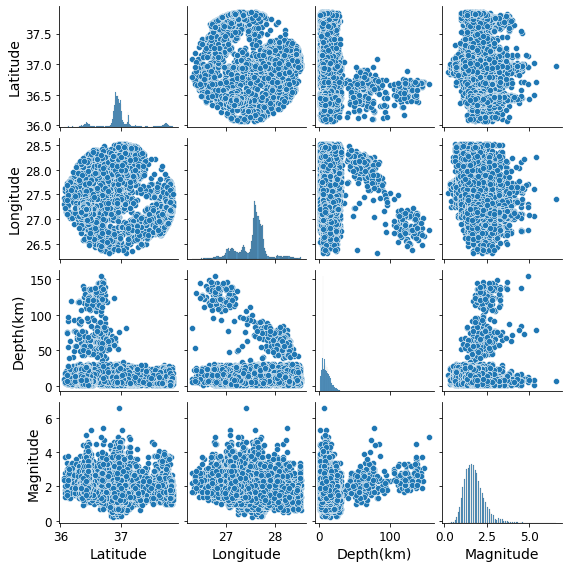

In [ ]:
cols=['Latitude','Longitude','Depth(km)', 'Magnitude']
sns.pairplot(data[cols],height = 2)

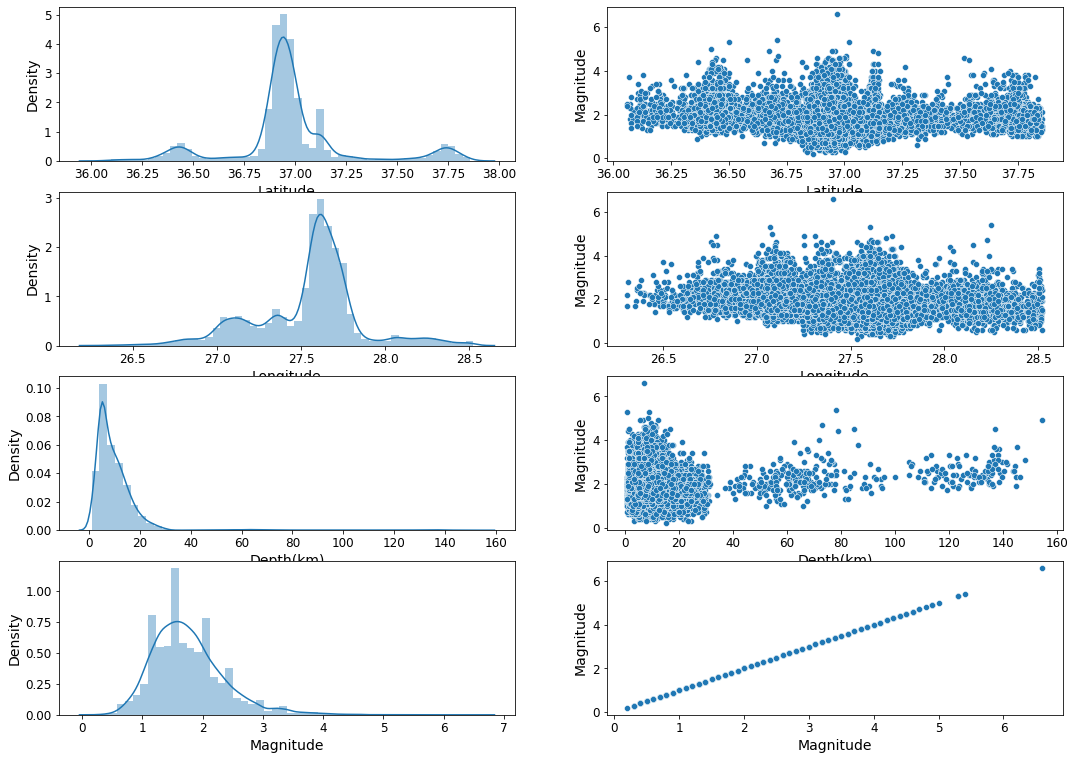

In [ ]:
plt.figure(figsize=(18,30))
for idx, f in enumerate(['Latitude','Longitude','Depth(km)', 'Magnitude']):
    plt.subplot(9,2,2*idx+1)
    sns.distplot(data[f])
    plt.subplot(9,2,2*idx+2)
    sns.scatterplot(x=f,y='Magnitude',data =data2)

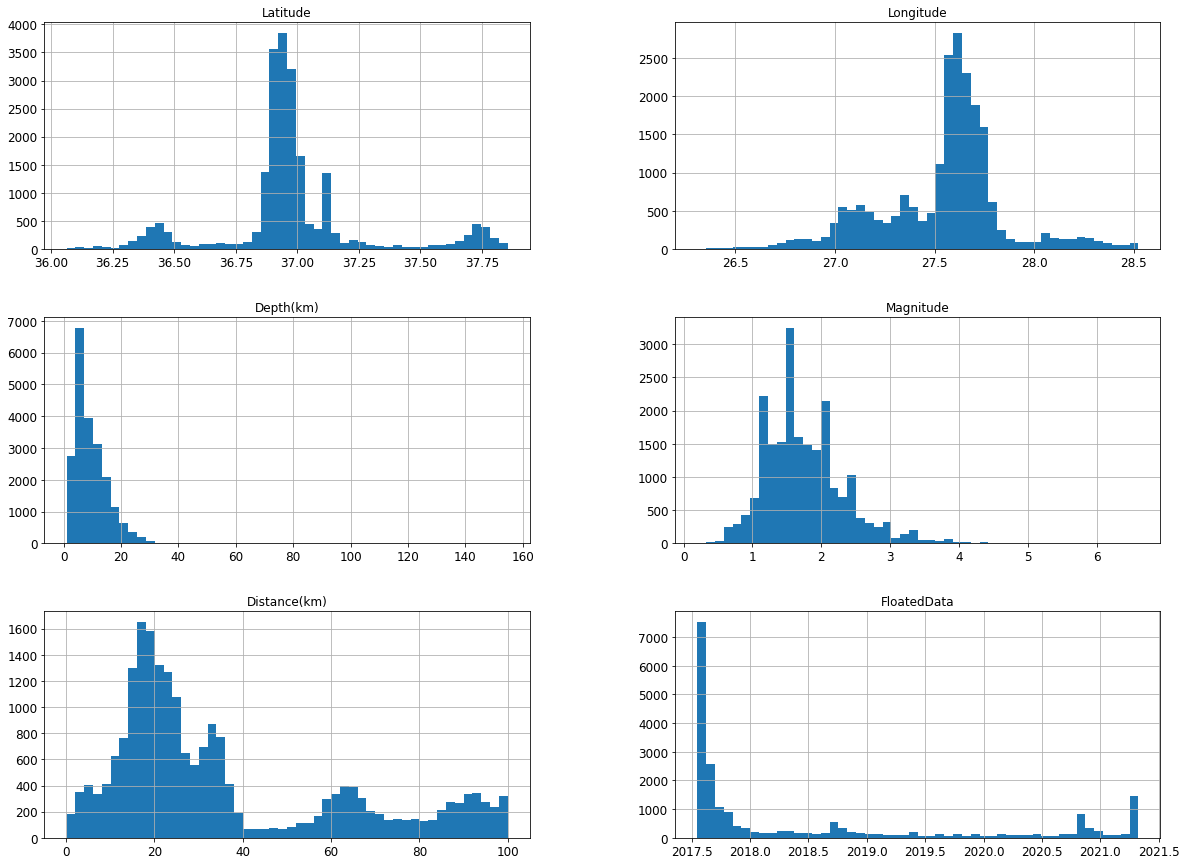

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data2.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6767173210>,
      dtype=object)

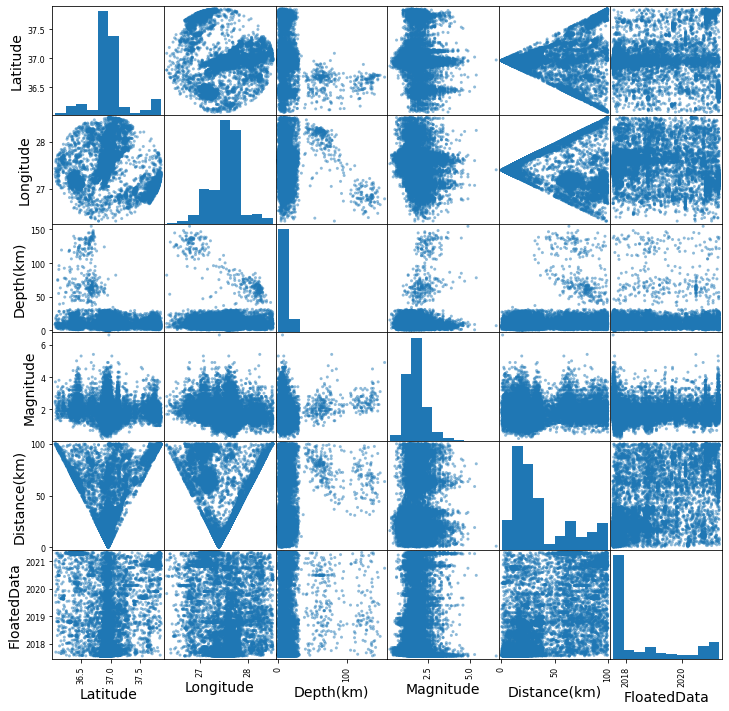

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data2, figsize=(12, 12))

Text(0.5, 1.0, 'Correlation between different fearures')

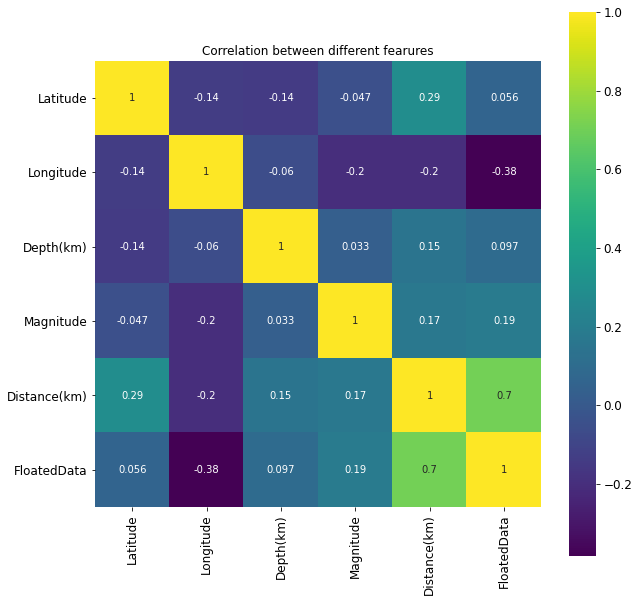

In [ ]:
correlation = data2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [ ]:
cor=data2.corr()
cor

,Latitude,Longitude,Depth(km),Magnitude,Distance(km),FloatedData
Latitude,1.000000,-0.135189,-0.141656,-0.047472,0.289734,0.056106
Longitude,-0.135189,1.000000,-0.059692,-0.204002,-0.200959,-0.382938
Depth(km),-0.141656,-0.059692,1.000000,0.032727,0.151793,0.096949
Magnitude,-0.047472,-0.204002,0.032727,1.000000,0.170710,0.187457
Distance(km),0.289734,-0.200959,0.151793,0.170710,1.000000,0.703813
FloatedData,0.056106,-0.382938,0.096949,0.187457,0.703813,1.000000


**DBSCAN depth-magnitude**

In [ ]:
data2.head()

,Date,Time,Latitude,Longitude,Depth(km),Magnitude,Distance(km),FloatedData,Date2,cluster
0,7/20/2017,03:28:22.81,37.5327,27.4825,5.4,1.8,63.98,2017.547945,2017-07-20,1
6,7/20/2017,22:10:00.82,36.9637,27.4223,5.4,2.6,2.03,2017.547945,2017-07-20,5
7,7/20/2017,22:31:09.66,36.9693,27.4057,7.1,6.6,1.15,2017.547945,2017-07-20,5
8,7/20/2017,22:34:15.33,36.9298,27.6018,5.5,3.7,18.29,2017.547945,2017-07-20,0
9,7/20/2017,22:34:40.17,36.9663,27.4163,5.4,3.7,1.61,2017.547945,2017-07-20,5


In [ ]:
x=data2.iloc[:,[4,5]].values

In [ ]:
x.shape

(21410, 2)

In [ ]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [ ]:
model=db.fit(x)

In [ ]:
label=model.labels_

In [ ]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 3


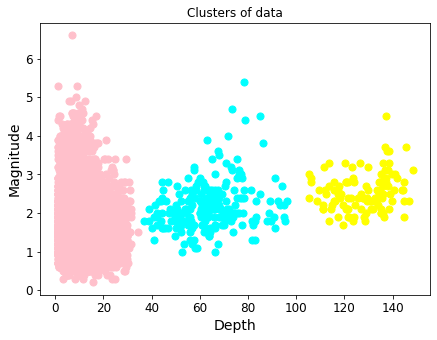

In [ ]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.title('Clusters of data')
plt.show()

**3d Clustering**

In [ ]:
# import the libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [ ]:
# input matrix for segmentation
x = data2[['Depth(km)','Magnitude','Latitude', 'Longitude']].values

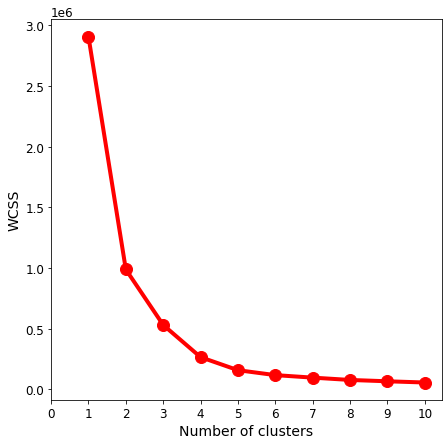

In [ ]:
# find the optimal number of clusters using elbow method  -- >This is for 3 features = [age,anual income,spending score]

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 8, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

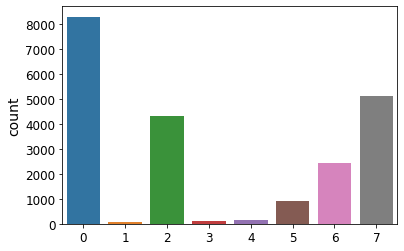

In [ ]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

In [ ]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])
print(x[y_clusters == 0,2][1])
print(x[y_clusters == 0,3][1])

5.4
2.6
36.9637
27.4223


In [ ]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Latitude'),yaxis = dict(title  = 'Longitude'),zaxis = dict(title  = 'Depth'),aspectmode='cube')

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 2], y=x[:, 3], z=-x[:, 1], mode='markers',marker=dict(color = labels, size= 1))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Depth'),yaxis = dict(title  = 'Latitude'),zaxis = dict(title  = 'Longitude'),aspectmode='cube')

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=-x[:, 0], y=x[:, 2], z=x[:, 3], mode='markers',marker=dict(color = labels, size= 1))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

**3D Clustering - 2**

In [ ]:
data2.head()

,Date,Time,Latitude,Longitude,Depth(km),Magnitude,Distance(km),FloatedData,Date2,cluster
0,7/20/2017,03:28:22.81,37.5327,27.4825,5.4,1.8,63.98,2017.547945,2017-07-20,1
6,7/20/2017,22:10:00.82,36.9637,27.4223,5.4,2.6,2.03,2017.547945,2017-07-20,5
7,7/20/2017,22:31:09.66,36.9693,27.4057,7.1,6.6,1.15,2017.547945,2017-07-20,5
8,7/20/2017,22:34:15.33,36.9298,27.6018,5.5,3.7,18.29,2017.547945,2017-07-20,0
9,7/20/2017,22:34:40.17,36.9663,27.4163,5.4,3.7,1.61,2017.547945,2017-07-20,5


In [ ]:
import numpy as np
from sklearn import preprocessing

DF_ARRAY = np.array(data2.iloc[:,3:7])          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data

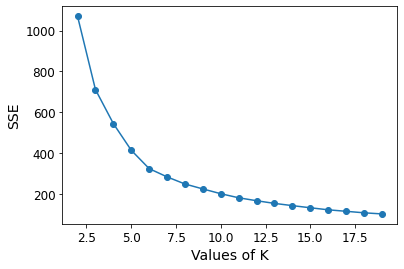

In [ ]:
import matplotlib.pyplot as plt

# Amount of values to be tested for K
Ks = range(2, 20)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(model.inertia_)

# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("SSE")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Creating our Model
kmeans = KMeans(n_clusters = 6)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
data2['cluster'] = kmeans.labels_

In [ ]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(data2.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = data2[data2.cluster == C]['Latitude'],
                                y = data2[data2.cluster == C]['Longitude'],
                                z = data2[data2.cluster == C]['Depth(km)'],
                                mode = 'markers', marker_size = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Latitude', titlefont_color = 'black'),
                                yaxis=dict(title = 'Longitude', titlefont_color = 'black'),
                                zaxis=dict(title = 'Depth(km)', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [ ]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(data2.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = data2[data2.cluster == C]['Latitude'],
                                y = data2[data2.cluster == C]['Longitude'],
                                z = data2[data2.cluster == C]['Magnitude'],
                                mode = 'markers', marker_size = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Latitude', titlefont_color = 'black'),
                                yaxis=dict(title = 'Longitude', titlefont_color = 'black'),
                                zaxis=dict(title = 'Magnitude', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [ ]:
data2.head()

,Date,Time,Latitude,Longitude,Depth(km),Magnitude,Distance(km),FloatedData,Date2,cluster
0,7/20/2017,03:28:22.81,37.5327,27.4825,5.4,1.8,63.98,2017.547945,2017-07-20,1
6,7/20/2017,22:10:00.82,36.9637,27.4223,5.4,2.6,2.03,2017.547945,2017-07-20,3
7,7/20/2017,22:31:09.66,36.9693,27.4057,7.1,6.6,1.15,2017.547945,2017-07-20,3
8,7/20/2017,22:34:15.33,36.9298,27.6018,5.5,3.7,18.29,2017.547945,2017-07-20,4
9,7/20/2017,22:34:40.17,36.9663,27.4163,5.4,3.7,1.61,2017.547945,2017-07-20,3


Standardising data
